In [493]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

In [494]:
df=pd.read_csv('training_data.csv',encoding='unicode_escape')

In [485]:
df

,Company,date,time,headline,Sentiment
0,AAPL,Nov-11-20,08:00PM,"Bye, Tariff Man. Bidens India Play Must Be Apps",1.0
1,AAPL,Nov-11-20,08:00PM,Dow Jones Stocks To Buy And Watch In November ...,1.0
2,AAPL,Nov-11-20,08:00PM,Stock Market Today: Big Tech Bounces Back,1.0
3,AAPL,Nov-11-20,08:00PM,Nasdaq Soars As Big Tech Bites Back; Dow Jones...,1.0
4,AAPL,Nov-11-20,08:00PM,Why Roku Stock Is Soaring Today,1.0
...,...,...,...,...,...
564,DBX,Jul-20-20,05:35PM,Why Dropbox Shot Nearly 10% Higher on Monday,1.0
565,DBX,Jul-20-20,05:35PM,Dropbox Shares Soar After Analyst Turns Positi...,1.0
566,DBX,Jul-20-20,05:35PM,Dropbox stock rises after Jefferies upgrade,1.0
567,DBX,Jul-08-20,03:02PM,Slack co-founder: We will be more aggressive w...,1.0


In [511]:
df=df.fillna(0.0)

In [512]:
train_data=df[['headline','Sentiment']]

In [513]:
train_sentence=df['headline']
train_label=df['Sentiment']

In [514]:
from sklearn.model_selection import train_test_split

X_train, X_val,y_train,y_val=train_test_split(train_sentence,train_label,test_size=0.2,random_state=55)

In [515]:
max_length = 100

tokenizer = Tokenizer(num_words = vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences,maxlen=max_length, truncating='post')

val_sequences = tokenizer.texts_to_sequences(X_val)
val_padded = pad_sequences(val_sequences,maxlen=max_length)

In [516]:
len(word_index)

1687

In [517]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 20, input_length=50),
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.GRU(128),
#     tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 50, 20)            200000    
_________________________________________________________________
gru_48 (GRU)                 (None, 50, 128)           57600     
_________________________________________________________________
gru_49 (GRU)                 (None, 128)               99072     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 129       
Total params: 356,801
Trainable params: 356,801
Non-trainable params: 0
_________________________________________________________________


In [518]:
history=model.fit(train_padded, y_train, epochs=10, validation_data=(val_padded, y_val))

Epoch 1/10
15/15 [==============================] - 2s 128ms/step - loss: 0.6215 - accuracy: 0.7099 - val_loss: 0.6745 - val_accuracy: 0.6491
Epoch 2/10
15/15 [==============================] - 1s 84ms/step - loss: 0.6034 - accuracy: 0.7143 - val_loss: 0.6427 - val_accuracy: 0.6491
Epoch 3/10
15/15 [==============================] - 1s 84ms/step - loss: 0.5529 - accuracy: 0.7143 - val_loss: 0.6573 - val_accuracy: 0.6491
Epoch 4/10
15/15 [==============================] - 1s 85ms/step - loss: 0.3656 - accuracy: 0.8330 - val_loss: 1.0026 - val_accuracy: 0.6228
Epoch 5/10
15/15 [==============================] - 1s 88ms/step - loss: 0.1456 - accuracy: 0.9582 - val_loss: 0.8609 - val_accuracy: 0.6579
Epoch 6/10
15/15 [==============================] - 1s 85ms/step - loss: 0.0713 - accuracy: 0.9736 - val_loss: 1.4542 - val_accuracy: 0.6579
Epoch 7/10
15/15 [==============================] - 1s 85ms/step - loss: 0.0592 - accuracy: 0.9802 - val_loss: 1.0465 - val_accuracy: 0.6316
Epoch 8/10
1

Text(0.5, 1.0, 'Training and validation loss')

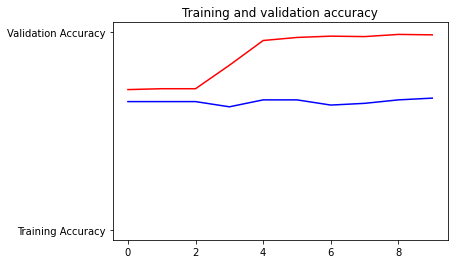

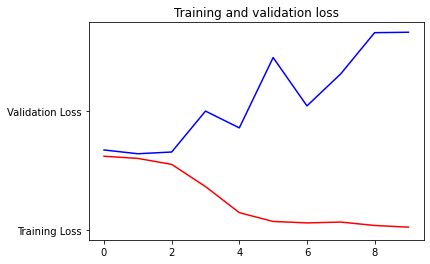

In [519]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs


plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [520]:
df2=pd.read_csv('news_headlines.csv',encoding='unicode_escape')

In [521]:
X_test=df2['headline']

In [522]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences,maxlen=max_length)

In [523]:
test_padded.shape

(93, 100)

In [524]:
y_pred=model.predict(test_padded)

In [525]:
y_pred=np.rint(y_pred)

In [526]:
y_pred

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],